In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
matplotlib 3.0.2
numpy 1.18.1
pandas 1.0.1
sklearn 0.20.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [12]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=[None, 5])
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [13]:
# layer.variables
layer.trainable_variables

[<tf.Variable 'dense_5/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.06327258,  0.15230326,  0.18318363, -0.13892668,  0.20727323,
          0.12572865, -0.16776356, -0.03306496, -0.15414892, -0.03890982,
          0.16549934, -0.1412297 ,  0.106721  , -0.03397965,  0.22453742,
          0.05938585, -0.0194921 ,  0.01710699, -0.1572889 , -0.08359849,
         -0.15828678, -0.22063746,  0.05832998, -0.17600355,  0.02723579,
         -0.11114416,  0.2314326 , -0.06830542,  0.04147132, -0.14149313,
          0.18829493, -0.05387622,  0.13743   , -0.08456419, -0.19863631,
         -0.19908923, -0.07676817,  0.02208631, -0.17562044, -0.15802261,
         -0.10067461,  0.18195327, -0.19834274, -0.20890011, -0.13544157,
          0.07843028,  0.10764794, -0.15540591, -0.02592877,  0.10799302,
         -0.19931617,  0.05056055,  0.09564139, -0.14544564,  0.01708014,
         -0.21476895,  0.07780488, -0.17345762,  0.11302795, -0.15195629,
         -0.10891864, -0.17838117, -0.1569

In [14]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [15]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [25]:
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [26]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.bias = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super(CustomizedDenseLayer, self).build(input_shape)
        
    def call(self, x):
        return self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus
])
model.summary()
model.compile(loss=customized_mse, optimizer='sgd', metrics=['mean_squared_error'])
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
history = model.fit(x_train_scaled, y_train,
                validation_data = (x_valid_scaled, y_valid),
                epochs = 5,
                callbacks = callbacks)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 50us/sample - loss: 1.2603 - mean_squared_error: 1.2603 - val_loss: 0.6877 - val_mean_squared_error: 0.6877
Epoch 2/5
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6010 - mean_squared_error: 0.6010 - val_loss: 0.5956 - val_mean_squared_error: 0.5956
E

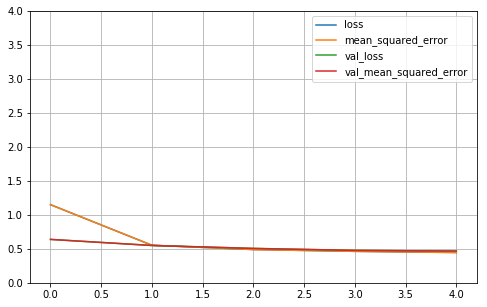

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 4)
    plt.show()
plot_learning_curves(history)

In [23]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.4642 - mean_squared_error: 0.4642


[0.4642320898152137, 0.46423203]